In [1]:
import pandas, numpy

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# 0. user-defined variables

In [4]:
input_file = '/Users/adrian/research/keflavik/results/deseq2/DESeq2_TPM_values.tsv'

# 1. read expression

In [5]:
expression = pandas.read_csv(input_file, sep='\t', index_col=0)
print(expression.shape)
expression

(39400, 24)


,M104_EV_1,M104_EV_2,M104_EV_3,M104_SET_1,M104_SET_2,M104_SET_3,M501_miR1_1,M501_miR1_2,M501_miR1_3,M501_miR2_1,...,M501_miRN_3,Sk28_miR1_1,Sk28_miR1_2,Sk28_miR1_3,Sk28_miR2_1,Sk28_miR2_2,Sk28_miR2_3,Sk28_miRN_1,Sk28_miRN_2,Sk28_miRN_3
ENSG00000000003,6.797406,8.013142,7.871205,8.252495,9.418473,7.909508,12.352898,11.469885,10.944441,9.755530,...,11.880304,7.567135,7.507606,6.619564,6.179612,7.325397,6.394710,8.402954,6.701116,7.042579
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,112.348307,103.428952,103.173280,105.785402,118.876836,121.678807,158.477745,150.412564,150.063555,153.145267,...,173.792994,172.140162,178.226073,161.903129,164.613884,156.342292,170.112319,172.158284,157.345640,155.517503
ENSG00000000457,2.910259,2.978912,2.889032,3.886458,2.866137,2.533814,6.935119,7.243830,6.533486,3.971509,...,4.908820,4.337312,3.374034,4.334404,4.541130,4.682219,4.271148,3.474064,3.740030,2.881081
ENSG00000000460,8.850792,9.507742,7.147435,20.763536,12.947957,11.171865,27.126479,28.214651,28.099204,27.864735,...,27.862659,16.691221,20.382040,16.822327,15.707889,17.253575,16.989679,17.025442,15.325235,19.238128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000293548,0.073071,0.000000,0.000000,0.101225,0.092270,0.137253,0.051730,0.078912,0.116115,0.103318,...,0.045053,0.000000,0.084325,0.000000,0.100518,0.000000,0.055765,0.000000,0.106823,0.000000
ENSG00000293550,0.013432,0.064740,0.036410,0.045137,0.015762,0.050114,0.047324,0.064582,0.071849,0.122841,...,0.028002,0.009500,0.000000,0.019536,0.000000,0.008583,0.018779,0.030867,0.000000,0.000000
ENSG00000293553,0.000000,0.000000,0.000000,0.000000,0.000000,0.081065,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000293563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 3. filter and transform

In [6]:
substantial_expression = expression[expression.max(axis=1) >= 2]
high_expression = expression[expression.max(axis=1) >= 100]

print(substantial_expression.shape)
print(high_expression.shape)

(15353, 24)
(2183, 24)


In [7]:
transpose = substantial_expression.transpose()
pca_substantial_expression = numpy.log2(transpose + 1)

transpose = high_expression.transpose()
pca_high_expression = numpy.log2(transpose + 1)

# 4. visualize substantial expression

In [8]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_substantial_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.41436277 0.23273654]


In [9]:
my_colors = ['black']*3 + ['tab:red']*3 + ['darkgreen']*3 + ['lightgreen']*3 + ['orange']*3 + ['darkblue']*3 + ['skyblue']*3 + ['gold']*3
my_markers = ['o']*6 + ['s']*9 + ['D']*9

legend_elements = [
    
    matplotlib.lines.Line2D([0], [0], color='white', marker='s', markerfacecolor='darkgreen', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='s', markerfacecolor='lightgreen', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='s', markerfacecolor='orange', markeredgecolor='white', markersize=20, alpha=2/3),

    matplotlib.lines.Line2D([0], [0], color='white', marker='D', markerfacecolor='darkblue', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='D', markerfacecolor='skyblue', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='D', markerfacecolor='gold', markeredgecolor='white', markersize=20, alpha=2/3),

    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='black', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='tab:red', markeredgecolor='white', markersize=20, alpha=2/3)
    
]

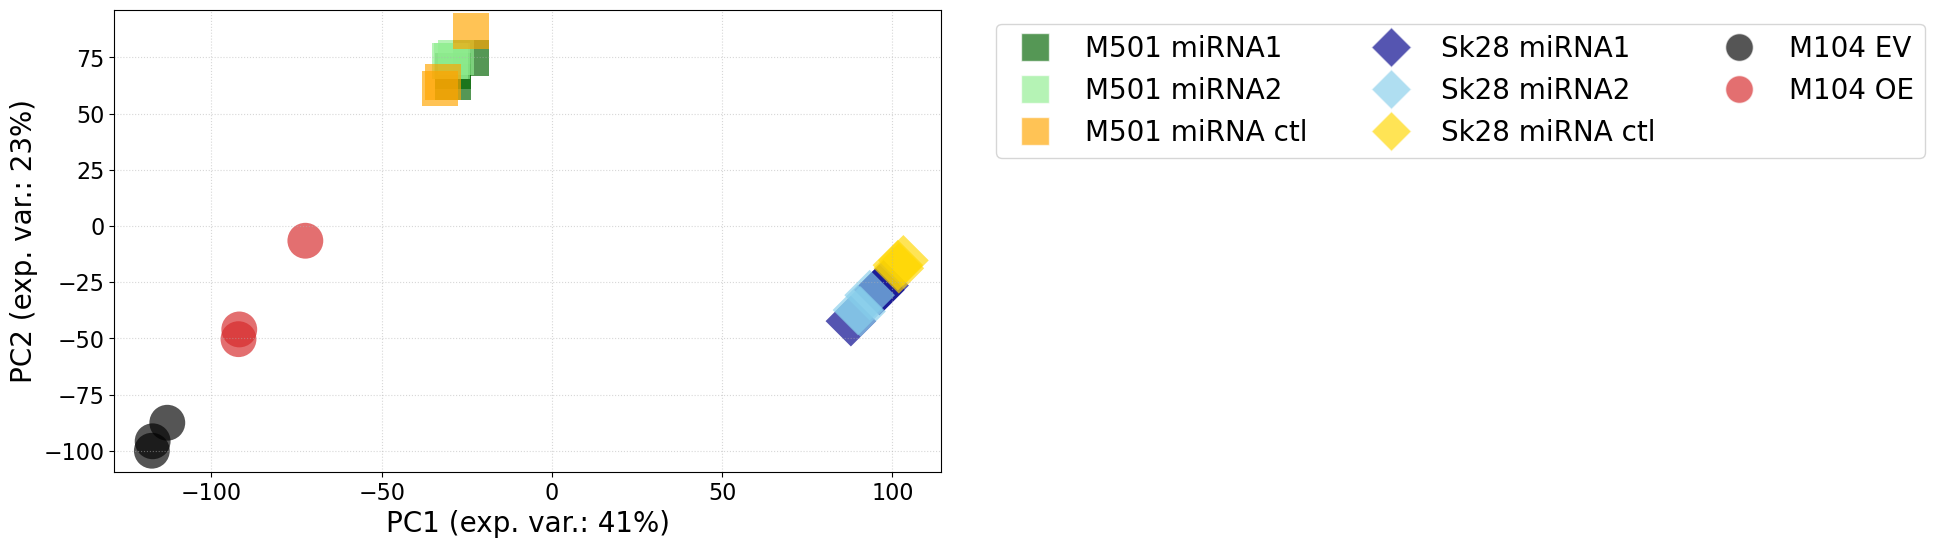

In [10]:
for i in range(len(new)):
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=666, c=my_colors[i], marker=my_markers[i], alpha=2/3, edgecolors='none')

matplotlib.pyplot.legend(legend_elements, ['M501 miRNA1', 'M501 miRNA2', 'M501 miRNA ctl', 'Sk28 miRNA1', 'Sk28 miRNA2', 'Sk28 miRNA ctl', 'M104 EV', 'M104 OE'], ncol=3, loc='upper left', bbox_to_anchor=(1.05, 1))
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
#matplotlib.pyplot.tight_layout()

# 4. visualize high expression

In [11]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_high_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.47205564 0.28558889]


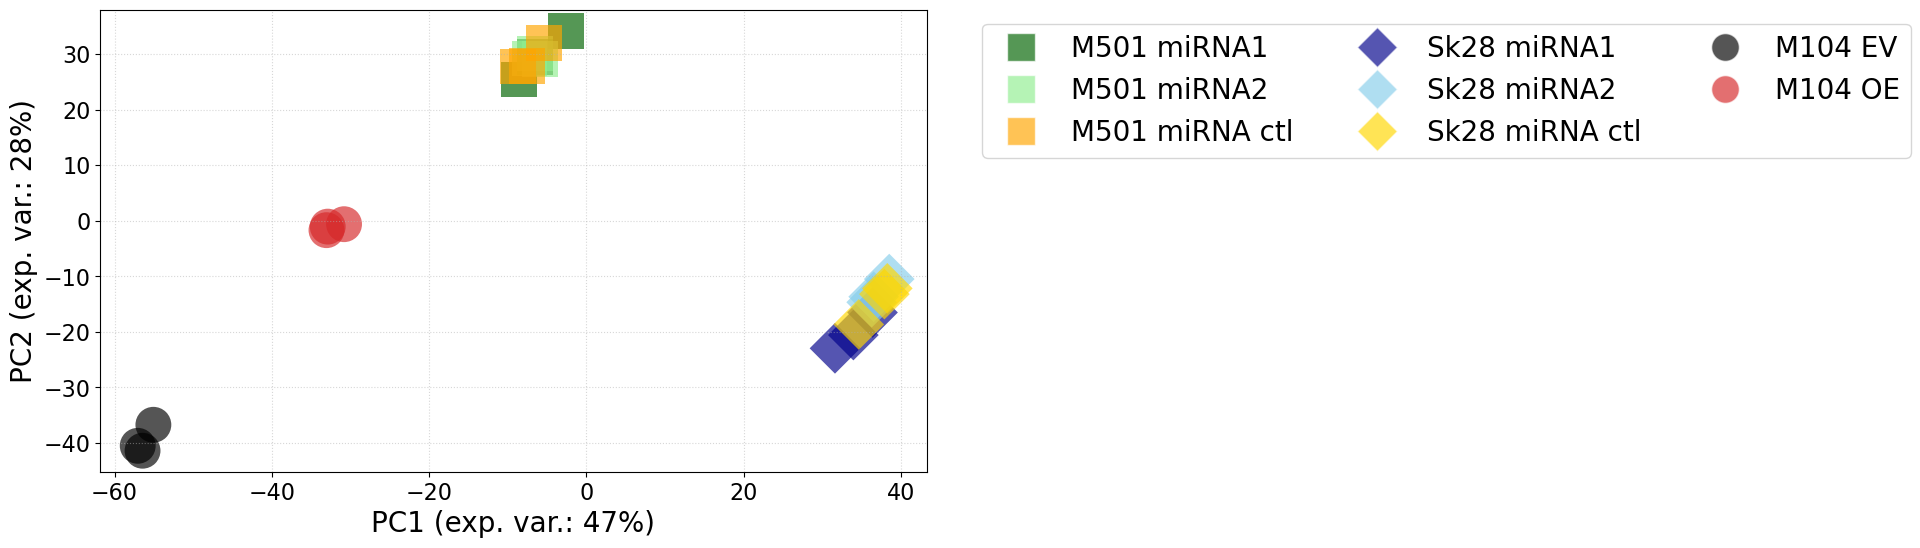

In [12]:
for i in range(len(new)):
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=666, c=my_colors[i], marker=my_markers[i], alpha=2/3, edgecolors='none')
    
matplotlib.pyplot.legend(legend_elements, ['M501 miRNA1', 'M501 miRNA2', 'M501 miRNA ctl', 'Sk28 miRNA1', 'Sk28 miRNA2', 'Sk28 miRNA ctl', 'M104 EV', 'M104 OE'], ncol=3, loc='upper left', bbox_to_anchor=(1.05, 1))
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
#matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('pca.svg')